# Assignment 1 
**Group B** \
Students: Elodie-Angélique Lendi, Mridhula Jayasankar, Clarice Jasmine Mihalache



In [15]:
# Imports cell
import pandas as pd
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, uniform, poisson

## Problem A

In [96]:
#1.Load csv file
df = pd.read_csv("periodic_table.csv")
print(df.head()) #just for now to see if it can be loaded for everyone

   AtomicNumber Symbol       Name  AtomicMass CPKHexColor  \
0             1      H   Hydrogen    1.008000      FFFFFF   
1             2     He     Helium    4.002600      D9FFFF   
2             3     Li    Lithium    7.000000      CC80FF   
3             4     Be  Beryllium    9.012183      C2FF00   
4             5      B      Boron   10.810000      FFB5B5   

  ElectronConfiguration  Electronegativity  AtomicRadius  IonizationEnergy  \
0                   1s1               2.20         120.0            13.598   
1                   1s2                NaN         140.0            24.587   
2               [He]2s1               0.98         182.0             5.392   
3               [He]2s2               1.57         153.0             9.323   
4           [He]2s2 2p1               2.04         192.0             8.298   

   ElectronAffinity OxidationStates StandardState  MeltingPoint  BoilingPoint  \
0             0.754          +1, -1           Gas         13.81         20.28   
1 

To load the csv file, it was added into the same folder as the notebook itself, then using pandas (imported as pd for facility) it was opened and its contents were loaded into a DataFrame called `df`. \
The `print(df.head())` displays the first five rows of the DataFrame. The purpose of this is to check if the document is read and displayed correctly.

In [97]:
#2. Python dictionary with keys as element symbol and values are atomic masses
element_dict = pd.Series(df.AtomicMass.values,index=df.Symbol).to_dict()
print(element_dict)

{'H': 1.008, 'He': 4.0026, 'Li': 7.0, 'Be': 9.012183, 'B': 10.81, 'C': 12.011, 'N': 14.007, 'O': 15.999, 'F': 18.99840316, 'Ne': 20.18, 'Na': 22.9897693, 'Mg': 24.305, 'Al': 26.981538, 'Si': 28.085, 'P': 30.973762, 'S': 32.07, 'Cl': 35.45, 'Ar': 39.9, 'K': 39.0983, 'Ca': 40.08, 'Sc': 44.95591, 'Ti': 47.867, 'V': 50.9415, 'Cr': 51.996, 'Mn': 54.93804, 'Fe': 55.84, 'Co': 58.93319, 'Ni': 58.693, 'Cu': 63.55, 'Zn': 65.4, 'Ga': 69.723, 'Ge': 72.63, 'As': 74.92159, 'Se': 78.97, 'Br': 79.9, 'Kr': 83.8, 'Rb': 85.468, 'Sr': 87.62, 'Y': 88.90584, 'Zr': 91.22, 'Nb': 92.90637, 'Mo': 95.95, 'Tc': 96.90636, 'Ru': 101.1, 'Rh': 102.9055, 'Pd': 106.42, 'Ag': 107.868, 'Cd': 112.41, 'In': 114.818, 'Sn': 118.71, 'Sb': 121.76, 'Te': 127.6, 'I': 126.9045, 'Xe': 131.29, 'Cs': 132.905452, 'Ba': 137.33, 'La': 138.9055, 'Ce': 140.116, 'Pr': 140.90766, 'Nd': 144.24, 'Pm': 144.91276, 'Sm': 150.4, 'Eu': 151.964, 'Gd': 157.2, 'Tb': 158.92535, 'Dy': 162.5, 'Ho': 164.93033, 'Er': 167.26, 'Tm': 168.93422, 'Yb': 173.05

As previously stated, the purpose of the code is to create a Python dictionary called `element_dict` where each key is a chemical element's symbol (like H for hydrogen, etc), taken from the `Symbol` column of the `df`(DataFrame). \
\
For each key (i.e. element), its value is the atomic mass of that element, taken from the `AtomicMass` column of `df`. \
\
Similarly to the *1.*, the `print(element_dict)` serves to see if the dictionary is correctly created. By doing this at each step, it would be easier to pinpoint an eventual problem, since for each step we have its output.

In [99]:
#3. Function that takes a chemical formula as input and returns its molar mass
def calculate_molar_mass(formula):
    import re
    pattern = r'([A-Z][a-z]?)(\d*)'
    matches = re.findall(pattern, formula)
    
    molar_mass = 0.0
    for (element, count) in matches:
        if element in element_dict:
            atomic_mass = element_dict[element]
            count = int(count) if count else 1
            molar_mass += atomic_mass * count
        else:
            raise ValueError(f"Element {element} not found in periodic table.")
    
    return molar_mass

compound = "C2H5O4"
print(f"The molar mass of the compound {compound} is {calculate_molar_mass(compound)} g/mol.")  #Example usage

The molar mass of the compound C2H5O4 is 93.05799999999999 g/mol.


The purpose here is to have a function that calculates the molar mass (molecular weight) of a chemical compound, given its formula as a string (e.g. $C_{2}H_{5}O_{4}$). \
It was written following the following points: 
* `import re`: module is imported to use regular expressions which are useful for pattern matching in strings 
* `pattern = r'([A-Z][a-z]?)(\d*)'`: this regular expression pattern is made to match an element symbol `[A-Z][a-z]?`, this means an uppercase letter possibly followed by a lowercase letter (like $H, He, O, Na$ etc.), then the `\d*`adds an optional number, which can be any digits, representing the count of atoms ; the parantheses create groups so that each match returns a tuple (element symbol, count) 
* `matches = re.findall(pattern, forumla)`: this finds all occurrences in the formula that match the pattern (for example here, for $C_{2}H_{5}O_{4}$ it would return `[('C', '2'), ('H', '5'), ('O', '4')]`) 
* `molar_mass = 0.0` initializes the total molar mass to zero 
* loop: iterates through each (element, count) pair found in the formula,checks if the element symbol exists in the previously created element_dict (which maps symbols to atomic masses), looks up the atomic mass for the element, converts the count string to an integer: if the count is empty (meaning only one atom), it defaults to 1, adds the total mass for this element (atomic mass × number of atoms) to the running total ; if the element symbol isn’t found in the dictionary, it raises an error
* at the end it returns the total calculated molar mass


In [100]:
#4. Extend the molecular mass function to handle parentheses in formulas using recursion
def calculate_molar_mass_with_parentheses(formula):
    import re
    def helper(formula):
        pattern = r'(\([^\(\)]+\)(\d*)|[A-Z][a-z]?(\d*))'
        matches = re.findall(pattern, formula)
        
        molar_mass = 0.0
        for match in matches:
            part = match[0]
            if part.startswith('('):
                inner_formula = part[1:part.index(')')]
                count = int(part[part.index(')')+1:]) if part[part.index(')')+1:] else 1
                molar_mass += helper(inner_formula) * count
            else:
                element = re.match(r'[A-Z][a-z]?', part).group()
                count = int(re.search(r'\d+', part).group()) if re.search(r'\d+', part) else 1
                if element in element_dict:
                    atomic_mass = element_dict[element]
                    molar_mass += atomic_mass * count
                else:
                    raise ValueError(f"Element {element} not found in periodic table.")
        
        return molar_mass
    
    return helper(formula)

compound_parantheses = "Ca3(PO4)2"
print(f"The molar mass of the compound {compound_parantheses} is {calculate_molar_mass(compound_parantheses)} g/mol.")  #Example usage


The molar mass of the compound Ca3(PO4)2 is 215.209762 g/mol.


This function calculates the molar mass of a chemical formula that may include parentheses (e.g $Ca_3(PO_4)_2$). Parentheses are used in chemistry to indicate groups of atoms that appear together multiple times. \
It was written following the following points: 
* `pattern = r'(\([^\(\)]+\)(\d*)|[A-Z][a-z]?(\d*))'`: this pattern works similarly as before, with only an added beginning part which can additonally match a group in parantheses, possibly followed by a number ; overall this pattern hence matches either a group in parantheses or a single element symbol, both being able to be followed by a number
* iterating over matches: if it starts with '(', it’s a group: it extracts the inner formula (everything inside the parentheses), determines the count (the number after the parentheses, or 1 if missing), calls `helper` recursively on the inner formula and multiplies the result by the count ; if it's not a group, it's a single element: it extracts the element symbol, determines the count (the number after the symbol, or 1 if missing), looks up the atomic mass in `element_dict` and adds the correct amount to the total (like previously, If an element is not found in `element_dict`, it raises a `ValueError`)
* after processing all parts, it returns the total molar mass

In [101]:
#5. Extend the function to handle hydrates (e.g., "CuSO4·5H2O")
def calculate_molar_mass_with_hydrates(formula):
    if '·' in formula:
        main_formula, hydrate_formula = formula.split('·')
        return calculate_molar_mass_with_parentheses(main_formula) + calculate_molar_mass_with_parentheses(hydrate_formula)
    else:
        return calculate_molar_mass_with_parentheses(formula)

compound_hydrate = "CuSO4·5H2O"
print(f"The molar mass of the compound {compound_hydrate} is {calculate_molar_mass(compound_hydrate)} g/mol.")  #Example usage


The molar mass of the compound CuSO4·5H2O is 177.631 g/mol.


This function calculates the molar mass of chemical formulas that include hydrates (e.g $CuSO_4·5 H_2O$), where there specifically is a dot ($·$) that separates the main compound from the water of hydration (or other hydrate).
It was written following the following points: 
* first, it checks for hydrate dot (·): if the dot is present, the formula is split into two parts: `main_formula`: the part before the dot (e.g., $CuSO_4$) and `hydrate_formula`: the part after the dot (e.g., $5H_2O$), If there is no dot in the formula, it simply calculates the molar mass of the whole formula as usual, with the function that can handle a molar mass with parantheses (`calculate_molar_mass_with_parentheses`)
* in the case where the dot is present, the function then calculates the molar mass of each part using the previously defined `calculate_molar_mass_with_parentheses` function and adds the two results together to get the total molar mass, which it returns

## Problem 2

In order to equilibrate the reaction a few basic steps were followed: 
1) First a dictionnary had to be created to assign each element its multiplicity
2) A matrix has to be created with the informations about the reactans and the products
3) Finally, the matrix must be solved in order to find the correct coefficients for the reaction

In [ ]:
def individual_element(mol):
    elements = {}
    i = 0
    while i < len(mol):
        if mol[i].isupper():
            el = mol[i]
            i += 1
            if i < len(mol) and mol[i].islower():
                el += mol[i]
                i += 1
            num = ""
            while i < len(mol) and mol[i].isdigit():
                num += mol[i]
                i += 1
            count = int(num) if num else 1
            elements[el] = elements.get(el, 0) + count
        else:
            i += 1
    return elements

In this function `individual_elements` we decompose all our reactants in order to know which atoms are present in the reaction and to know how many of each atom are present in each molecule. This is very useful in order to build our matrix later on. 

As all the elements start with a capital letter each element was searched in this way. In order to avoid the problem for ("Na") being divided into ("N", "a"), this function also looks at the letter following the capitalized letter to see if there is a lowercase character following it. Now our variable `el` contains the name of our element. In order to get an idea of the number of atom present, this function also looks at the numbers following the element using the function `.isdigits()`. If there is no number following the element, a default value of 1 is taken. 

Finally the elements and the element count is added to the dictionnary. 

In [89]:
def balance_reaction(reactants, products):
    # Step 1
    all_elements = set()
    for mol in reactants + products:
        all_elements.update(individual_element(mol).keys())
    all_elements = sorted(all_elements)

    # Step 2
    species = reactants + products
    matrix = []
    for el in all_elements:
        row = []
        for i, mol in enumerate(species):
            counts = individual_element(mol)
            cnt = counts.get(el, 0)
            row.append(cnt if i < len(reactants) else -cnt)
        matrix.append(row)

    A = sp.Matrix(matrix)

    # Step 3
    nullspace = A.nullspace()
    if not nullspace:
        raise ValueError("No solution found for this reaction.")
    
    vec = nullspace[0] 
    denoms = [r.q for r in vec]
    lcm_den = sp.lcm(denoms)
    int_vec = [int(r * lcm_den) for r in vec]

    from math import gcd
    from functools import reduce
    g = reduce(gcd, [abs(x) for x in int_vec if x != 0])
    int_vec = [x // g for x in int_vec]

    n_react = len(reactants)
    react_vec = int_vec[:n_react]
    prod_vec = int_vec[n_react:]

    react = [f"{c}{m}" for c, m in zip(react_vec, reactants)]
    prod = [f"{c}{m}" for c, m in zip(prod_vec, products)]

    return react, prod, react_vec, prod_vec


The main part of the code can be divided in three subparts each with a particular aim. 

As said earlier a matrix will be used in order to equilibrate the reaction. Hence we need to know which elements are present in the reaction without taking duplicates. Using `set` in the first part allows to remove all duplicates. 

In the second part we look at both the reactants and the products. Taking the set that was created above, we can compare for each element the number of times it appears in each molecule. In this part, we take a positive value for the reactants and a negative value for the product, this is due to the atom conservation law. It is in this part that the matrix is created, where the rows represent the individual elements and the columns represent the molecules (the reactants first, and the products after). 

From Lavoisier's law of conservation of mass, it can be known that mass is neither created nor destroyed during a chemical reaction. In this last part, we find the solutions to equilibrate the reaction and find the correct stoechiometry using the stated law to construct an equation for our matrix. The function `.nullspace()` returns a list of basis vector, where each vector in the nullspace is a possible answer for the ratios of coefficients. In other words, the `.nullspace()` of a matrix A is the set of all vectors x such that A⋅x=0. The following equation is true as this is the set of possible coefficient combinations that conserve every element. 
However, this method could give us ratios instead of integer values for the stoechiometry. Hence we find the smallest common multiple and do a multiplication in order to get integer values. 

Once all these steps have been executed, the final answers shows up. 

In [110]:
react1, prod1, react_coeffs1, prod_coeffs1 = balance_reaction(reactants=["H2", "O2"], products=["H2O"])
react2, prod2, react_coeffs2, prod_coeffs2 = balance_reaction(reactants=["N2", "H2"], products=["NH3"])
react3, prod3, react_coeffs3, prod_coeffs3 = balance_reaction(reactants=["SO2", "O2"], products=["SO3"])

In [109]:
print("Reactants: ", react1, "Products", prod1)
print("Reactants: ", react2, "Products", prod2)
print("Reactants: ", react3, "Products", prod3)

Reactants:  ['2H2', '1O2'] Products ['2H2O']
Reactants:  ['1N2', '3H2'] Products ['2NH3']
Reactants:  ['2SO2', '1O2'] Products ['2SO3']


In [103]:
def total_mass(molecule_coeff_dict, element_dict):
    """
    molecule_coeff_dict: dictionary {molecule: coefficient}
    element_dict: dictionary {element: atomic_mass}
    Returns total mass in grams
    """
    mass = 0.0
    for mol, coef in molecule_coeff_dict.items():
        mass += coef * calculate_molar_mass(mol)
    return mass

This takes into account the stoechiometry of the reaction to calculate the correct mass of the reactants and/or the products. It uses `element_dict` to find the corresponding molecular weight of an element and multiply it by the number of times the atom appears. 

In [92]:
def verify_mass_conservation(reactants, products, react_coeffs, prod_coeffs, element_dict):
    react_dict = {mol: coef for mol, coef in zip(reactants, react_coeffs)}
    prod_dict = {mol: coef for mol, coef in zip(products, prod_coeffs)}

    mass_react = total_mass(react_dict, element_dict)
    mass_prod = total_mass(prod_dict, element_dict)

    print(f"Total mass of reactants: {mass_react:.3f} g/mol")
    print(f"Total mass of products: {mass_prod:.3f} g/mol")

    if abs(mass_react - mass_prod) < 1e-6:
        print("The reaction is balanced: total mass is conserved.")
        return True
    else:
        print("The reaction is NOT balanced: total mass differs.")
        return False

Finally, the `verify_mass_conservation` verifies that the sum of the mass of all the reactant is equal to the sum of mass of all the products. 
Using the zip function here allowed us to pair each molecule with its correct coefficient. With the help of the total_mass function we calculate the molecular weight of the reactants and the products and finally compare both the results to see if the reaction was correctly equilibrated. 

In [112]:
verify_mass_conservation(["H2", "O2"],["H2O"], react_coeffs1, prod_coeffs1, element_dict)
verify_mass_conservation(["N2", "H2"],["NH3"], react_coeffs2, prod_coeffs2, element_dict)
verify_mass_conservation(["SO2", "O2"],["SO3"], react_coeffs3, prod_coeffs3, element_dict)


Total mass of reactants: 36.030 g/mol
Total mass of products: 36.030 g/mol
The reaction is balanced: total mass is conserved.
Total mass of reactants: 34.062 g/mol
Total mass of products: 34.062 g/mol
The reaction is balanced: total mass is conserved.
Total mass of reactants: 160.134 g/mol
Total mass of products: 160.134 g/mol
The reaction is balanced: total mass is conserved.


True

## Problem 3

### Simulation /Modeling

### 1. Monte-Carlo $\pi$ estimation

The aim of this code is to write a function `estimate_pi` that uses Monte-Carlo simulation to estimate the value of $\pi$. 
In order to do this, the function shoots $N$ random points uniformly inside a square of side 2 (x and y from -1 to 1), counts how many points fall inside the unit circle (distance ≤ 1 from origin). Considering the ratio between the area of the circle and that of the square to be equal the one between the total number of points $N$ and those in the circle, we find an estimated value of $\pi$.Then, we can use this function to estimate $\pi$ value for different $N$ values. 

In [79]:
def estimate_pi(num_points_N):
    num_inside_circle = 0
    for i in range(num_points_N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if ((x**2)+(y**2))<=1 :
            num_inside_circle += 1
    
    pi_estimation = 4 * (num_inside_circle)/(num_points_N)

    return pi_estimation

print(f"The estimated value of pi is : {estimate_pi(10**7)}")

The estimated value of pi is : 3.1420044


Our function appears to give a value close to $\pi$ for the first few decimal places, but it is not very accurate, as we will see below with the `convergence graph` as a function of $N$. Here, we will test the value we obtain by averaging 10 estimated values of $\pi$. However, even if we obtain a value that is closer to $\pi$, this estimate is still not ideal. Indeed, it is possible that all 10 samples we take are higher than the actual value of $\pi$ (since we are using random functions). For this idea to be fully effective, the number of samples (the number of times we apply the `estimate_pi` function for a given value of $N$) would have to tend towards infinity. As we will see in the graph below, another way to improve the estimate is to increase the number of $N$.

In [80]:
def average_pi_value(num_running, num_points_N):

    pi_values = []
    pi_values.append(estimate_pi(num_points_N))

    pi_mean_value = statistics.mean(pi_values)
    
    print(f"Pi mean value for {num_running} iterations of the function is {pi_mean_value}")
    
average_pi_value(10, 10**6)


Pi mean value for 10 iterations of the function is 3.141024


The next step is to visualise the error of this method/estimation based on the number of points $N$ that we have. To do so, we can plot the graph of the estimated $\pi$ as a function of the number of random points N that we use in the simulation. We can do this in different ways. One way is to generate random values for $N$, then test the function on these values and create a graph with them. Another method would be to record a point every 1,000 iterations for N (called `step` in `plot_convergence`), for example, and plot the corresponding value on the graph to see the convergence. In this second method, the user can also introduce the "step", so the gap they want between the points. The true value of $\pi$ is also shown on the graph in order to better visualise the deviation of the estimate from it. In the function below, the second method described above has been chosen.

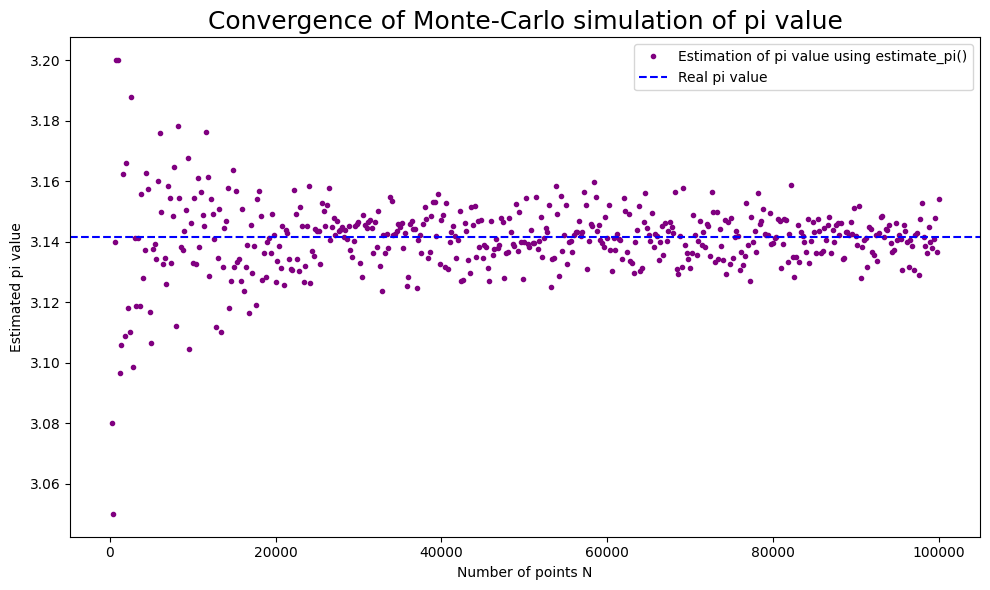

In [81]:
def plot_convergence(num_points_N, step):
    # x-values
    N_values = list(range(step, num_points_N+1, step))
    #y-values
    pi_estimated_values = []

    for i in N_values:
        pi_estimated_values.append(estimate_pi(i))

    # Graph parameters
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, pi_estimated_values, linestyle = '', marker = '.', color = 'purple', label = 'Estimation of pi value using estimate_pi()')
    plt.axhline(y= np.pi, color='b', linestyle ='--', label = 'Real pi value')
    plt.legend()
    plt.title(f"Convergence of Monte-Carlo simulation of pi value", size = 18)
    plt.xlabel("Number of points N")
    plt.ylabel("Estimated pi value", )
    plt.tight_layout()
    plt.show()


plot_convergence(10**5, 200)



### 2. Chemistry-inspired Monte-Carlo
The goal of this second part is to simulate $M$ random molecular collisions in a box, then to assign random energies to each collision (e.g., uniform or normal distribution) and to count how many collisions exceed a given threshold energy. Finally, we interpret the fraction as an estimate of reaction probability.\
In other words, we introduce the number of collisions into our system as well as the energy threshold above which we consider there to be sufficient energy for the reaction to occur. By randomly assigning energy to each of these collisions using normal, uniform, Poisson, etc. distributions and counting how many of them are above the threshold, we can determine the probability that the reaction will occur. This corresponds to the number of collisions with sufficient energy divided by the total number of collisions.\

In this simple model only energies are considered.To complicate the problem further, we could also have considered the positions and dynamics of the particles in the box. This introduces additional parameters to determine whether the particles will react with each other or not, such as the distance between them, etc.

In [ ]:
def collisions_uniform_dist(num_collisions: int, energy_threshold: float):

    energy_collisions = np.random.uniform(0, 1, num_collisions)
    collisions_above_treshhold = sum(energy_collisions >= energy_threshold)

    probability_simulation = collisions_above_treshhold/num_collisions

    # Theoretical probability using the area under the curve
    a, b = 0, 1
    theoretical_probability = 1 - uniform.cdf(energy_threshold, loc=a, scale=b - a)

    print(f"The simulated probability of having a collision is {probability_simulation}")
    print(f"The theoretical probability of having a collision determined using the area under the curve is {theoretical_probability:.4f}")

    # Plotting graph of the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(energy_collisions, bins=50, color='thistle', edgecolor='black', alpha=0.7, density=True)
    plt.axvline(energy_threshold, color='hotpink', linestyle='--', linewidth=2, label=f'Threshold = {energy_threshold:.2f}')
    plt.title(f'Energy distribution of collisions uniform; Probability of collision: {probability_simulation:.4f}', size = 16)
    plt.xlabel('Energy')
    plt.ylabel('Probability density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return probability_simulation, theoretical_probability

The probability of having a collision is 0.3084
The theoretical probability of having a collision determined using the area under the curve is 0.3000


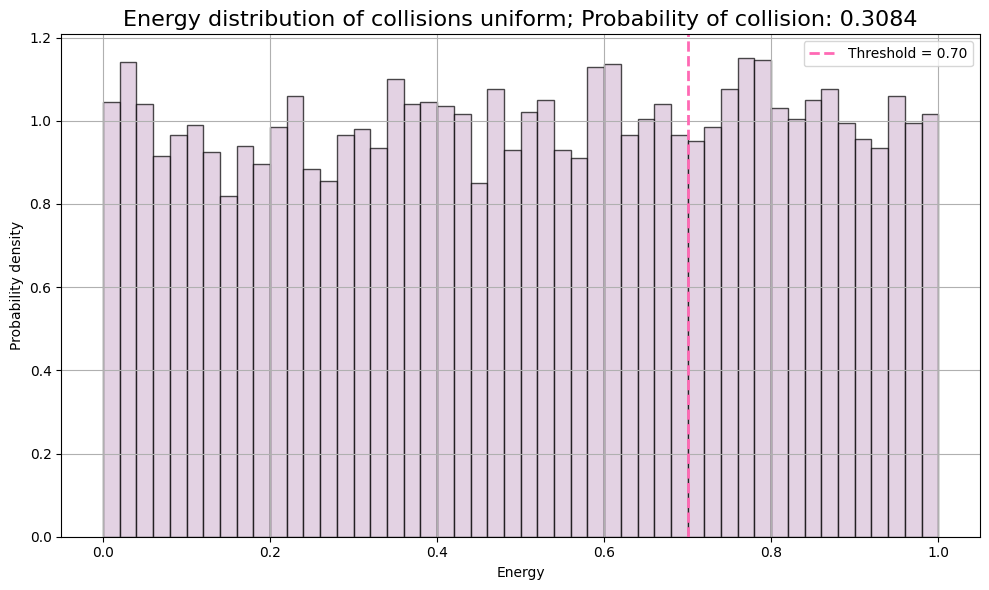

(np.float64(0.3084), np.float64(0.30000000000000004))

In [26]:
collisions_uniform_dist(10000, 0.7)

In [23]:
def collisions_normal_dist(num_collisions: int, energy_threshold: float):

    energy_collisions = np.random.normal(0, 1, num_collisions)
    collisions_above_treshhold = sum(energy_collisions >= energy_threshold)

    probability_simulation = collisions_above_treshhold/num_collisions

    # Theoretical probability using the area under the curve
    theoretical_probability = 1 - norm.cdf(energy_threshold)

    print(f"The simulate probability of having a collision is {probability_simulation}")
    print(f"The theoretical probability of having a collision determined using the area under the curve is {theoretical_probability:.4f}")

    # Plotting graph of the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(energy_collisions, bins=50, color='thistle', edgecolor='black', alpha=0.7, density=True)
    plt.axvline(energy_threshold, color='hotpink', linestyle='--', linewidth=2, label=f'Threshold = {energy_threshold:.2f}')
    plt.title(f'Energy distribution of collisions normal; Probability of collision (simulated): {probability_simulation:.4f}', size = 16)
    plt.xlabel('Energy')
    plt.ylabel('Probability density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return probability_simulation, theoretical_probability

The simulate probability of having a collision is 0.2451
The theoretical probability of having a collision determined using the area under the curve is 0.2420


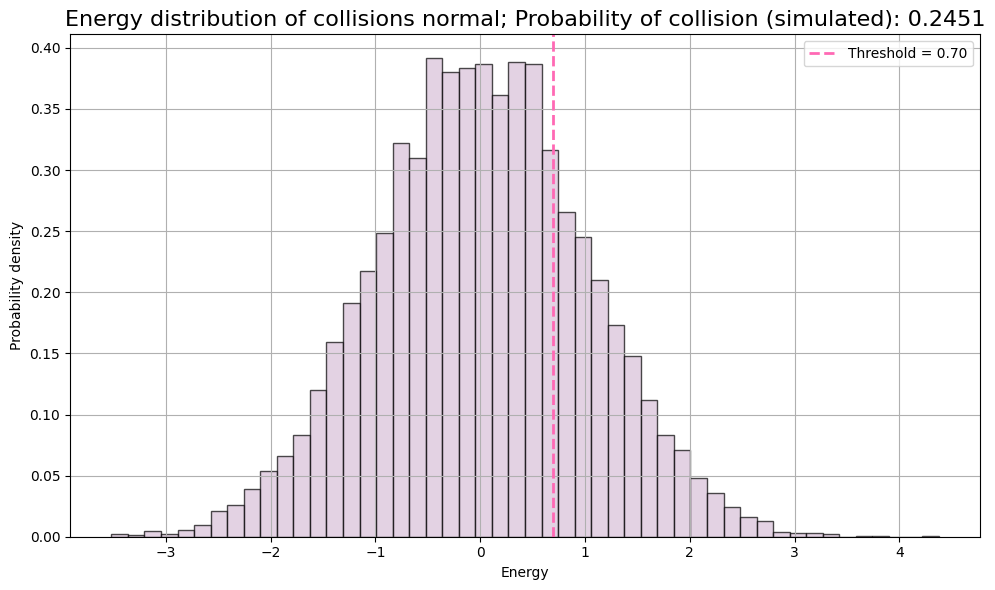

(np.float64(0.2451), np.float64(0.24196365222307303))

In [24]:
collisions_normal_dist(10000, 0.7)

## Comments about the different distributions (Uniform and Normal)

These two simulations show us several things. First, let's compare the experimental values obtained for the two distributions with the theoretical values obtained by integrating the area under the curves from the energy threshold. 

### Uniform distribution:

In this distribution, the simulated value is approximately 0.3084, while the theoretical value is 0.3000. The values are close, but not equal. This is mainly due to the fact that the accuracy of the simulated value will increase with the number of cases (number of collisions) we have. This is due to sampling. In fact, we will move increasingly from a discrete case to a continuous case. To obtain the theoretical value, we use the integration of the repartition function of the uniform distribution for energy above the threshold, given by the following formula.

$$
F(x) = P(E \leq x) =
\begin{cases}
0 & \text{si } x < a \\
\frac{x - a}{b - a} & \text{si } a \leq x \leq b \\
1 & \text{si } x > b
\end{cases}
$$

### Normal distribution:
In this distribution, the simulated value is approximately 0.2451, while the theoretical value is 0.2420. As we can see, the values are close, although not exactly equal. As before, this is mainly due to the fact that the accuracy of the simulated value will increase with the number of cases (number of collisions) we have. In fact, we will move increasingly from a discrete case to a continuous case. This trend is visible when we vary the number of collisions. To obtain the theoretical value, we use the integration of the repartition function of the normal distribution for energy above the threshold.

$$
P(E \geq x) = 1 - F(x) = \int_{x}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{t^2}{2}} dt
$$


Let us now discuss the values obtained between the two distributions. We see that for the chosen energy threshold (here 0.7), the two probabilities are close. This can be explained by the fact that we are in an area where the two distributions are ‘similar’. However, for other energy thresholds, it is likely that the values for each of the two distributions will not be similar.